Attention mechanisms

Most transformer models use full attention in the sense that the attention matrix is square. It can be a big computational bottleneck when you have long texts. Longformer and reformer are models that try to be more efficient and use a sparse version of the attention matrix to speed up training.
LSH attention

Reformer uses LSH attention. In the softmax(QK^t), only the biggest elements (in the softmax dimension) of the matrix QK^t are going to give useful contributions. So for each query q in Q, we can consider only the keys k in K that are close to q. A hash function is used to determine if q and k are close. The attention mask is modified to mask the current token (except at the first position), because it will give a query and a key equal (so very similar to each other). Since the hash can be a bit random, several hash functions are used in practice (determined by a n_rounds parameter) and then are averaged together.
Local attention

Longformer uses local attention: often, the local context (e.g., what are the two tokens to the left and right?) is enough to take action for a given token. Also, by stacking attention layers that have a small window, the last layer will have a receptive field of more than just the tokens in the window, allowing them to build a representation of the whole sentence.

Some preselected input tokens are also given global attention: for those few tokens, the attention matrix can access all tokens and this process is symmetric: all other tokens have access to those specific tokens (on top of the ones in their local window). This is shown in Figure 2d of the paper, see below for a sample attention mask:

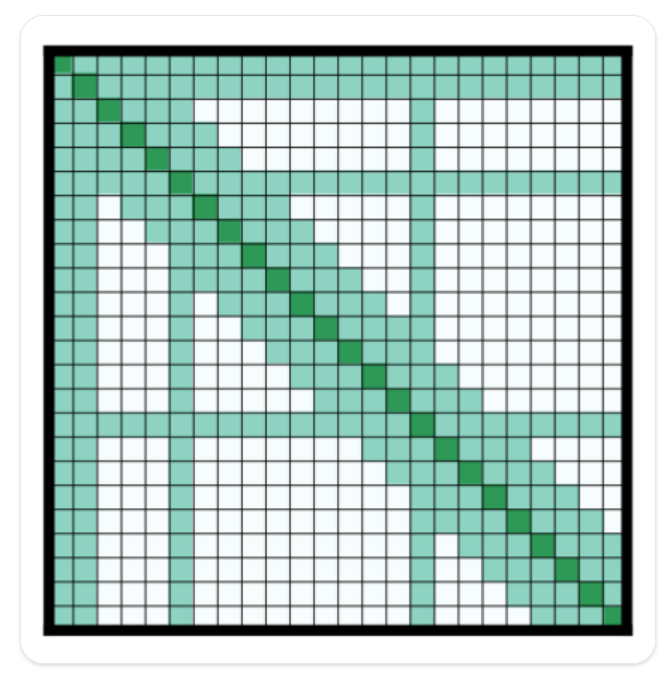

Using those attention matrices with less parameters then allows the model to have inputs having a bigger sequence length.
Other tricks
Axial positional encodings

Reformer uses axial positional encodings: in traditional transformer models, the positional encoding E is a matrix of sizell bydd,ll being the sequence length anddd the dimension of the hidden state. If you have very long texts, this matrix can be huge and take way too much space on the GPU. To alleviate that, axial positional encodings consist of factorizing that big matrix E in two smaller matrices E1 and E2, with dimensionsl1×d1l1​×d1​ andl2×d2l2​×d2​, such thatl1×l2=ll1​×l2​=l andd1+d2=dd1​+d2​=d (with the product for the lengths, this ends up being way smaller). The embedding for time stepjj in E is obtained by concatenating the embeddings for timestepj%l1j%l1 in E1 andj//l1j//l1 in E2.